# MultiJob class development

01/10/20 Updating with angle-resolved plotting (basic). (See [ePSproc_multijob_class_dev_011020_bemo.ipynb](http://localhost:8888/lab/tree/dev/ePSproc/classDev/ePSproc_multijob_class_dev_011020_bemo.ipynb) for starter tests.)

23/09/20 Testing dev code with N2O dataset. (See [ePSproc_multijob_class_dev_140920_bemo.ipynb](http://localhost:8888/lab/tree/dev/ePSproc/classDev/ePSproc_multijob_class_dev_140920_bemo.ipynb) for class dev notes.)

14/09/20 Working up class-based job handling, see in particular [XeF2 work for a prototype](https://phockett.github.io/ePSdata/XeF2-preliminary/XeF2_multi-orb_comparisons_270320-dist.html).

## Setup

In [1]:
!hostname

Stimpy


In [2]:
!conda env list

# conda environments:
#
                         C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64
                         C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\dataVis3D
                         C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\dataVis3D-yt
                         C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\ePSdev
                         C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\ePSpkgTest2
                         C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\fibre-sim
                         C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\ipykernel_py2
                         C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\pkgTest
                         C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\pypi-test
                        

In [3]:
import sys
import os
from pathlib import Path
import numpy as np
# import epsproc as ep
import xarray as xr

from datetime import datetime as dt
timeString = dt.now()

In [4]:
# For module testing, include path to module here, otherwise use global installation
if sys.platform == "win32":
    modPath = r'D:\code\github\ePSproc'  # Win test machine
    winFlag = True
else:
    modPath = r'/home/femtolab/github/ePSproc/'  # Linux test machine
    winFlag = False
    
sys.path.append(modPath)
import epsproc as ep
# # TODO: tidy this up!
# from epsproc.util import matEleSelector
# from epsproc.geomFunc import geomCalc, geomUtils
# from epsproc.geomFunc.lfblmGeom import lfblmXprod

# Plotters
from epsproc.plot import hvPlotters

# Multijob class dev code
from epsproc.classes.multiJob import ePSmultiJob

* pyevtk not found, VTK export not available. 


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
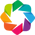

In [5]:
hvPlotters.setPlotters()
# import bokeh
# import holoviews as hv
# hv.extension('bokeh')

## Load data

In [6]:
# Assume job/orb dir format

# Set/check working dir - set for N2O data on Stimpy
# currDir = os.getcwd()
# if winFlag:
#     workingDir = r'D:\VMs\Share\ePSshare\N2O\N20_wf'  # UB20 VM shared dir
# else:
#     workingDir = !pwd

# print(workingDir)


# # Scan for subdirs, based on existing routine in getFiles()
# fileBase = workingDir
fileBase = r'D:\VMs\Share\ePSshare\N2O\N20_wf'  # Test dir on Stimpy
# fType = ''
# fList = [os.path.join(fileBase, f) for f in os.listdir(fileBase) if f.endswith(fType)]

# For other methods overview/refresher, see 
#  - https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory
#  - https://stackoverflow.com/questions/973473/getting-a-list-of-all-subdirectories-in-the-current-directory
#  - Fast recursive subdir (with scandir) https://stackoverflow.com/a/59803793/2441026
# Also epsman routines.

# Set for testing only
# fileBase = r'E:\temp\ePS\N2Otest'

In [7]:
N2Odata = ePSmultiJob(fileBase, verbose = 0)
datasets = [0]
N2Odata.scanFiles(keys = datasets)
N2Odata.jobsSummary()

Found 1 directories, with 7 files.
Job structure: subDirs
(Results E stacked to one dataset per dir.)

*** Job dir 0 details
Directory: D:\VMs\Share\ePSshare\N2O\N20_wf\orb1_S
7 files
{   'batch': 'ePS N2O, batch N2O_wf, orbital orb1_S',
    'event': 'orb 1 ionization (O 1s, S/A1).',
    'orbE': -562.219888836424,
    'orbLabel': 'O 1s, S/A1'}


In [8]:
# Chec Xarray dataset for details - note this may show lots of NaNs, depending on unified coord system
N2Odata.dsXS

<xarray.Dataset>
Dimensions:  ()
Data variables:
    *empty*

## Plot cross-sections and betas

These are from ePolyScat's getCro function, and are LF (unaligned ensemble) results.

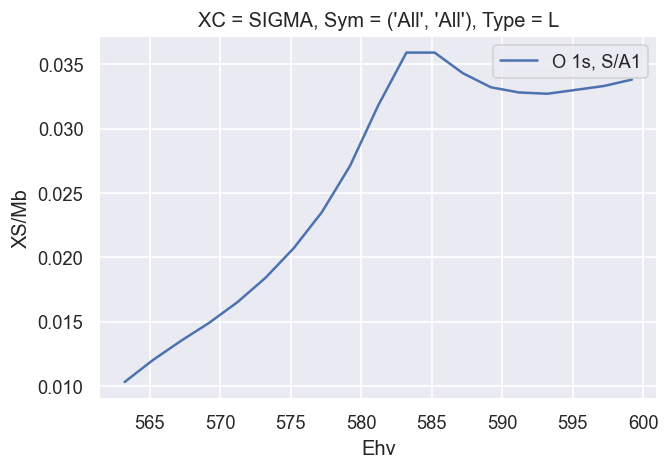

In [9]:
# Comparitive plot over datasets (all symmetries only)
Erange=[550, 600]
N2Odata.plotGetCroComp(pType='SIGMA', Etype='Ehv', Erange=Erange, keys=datasets)

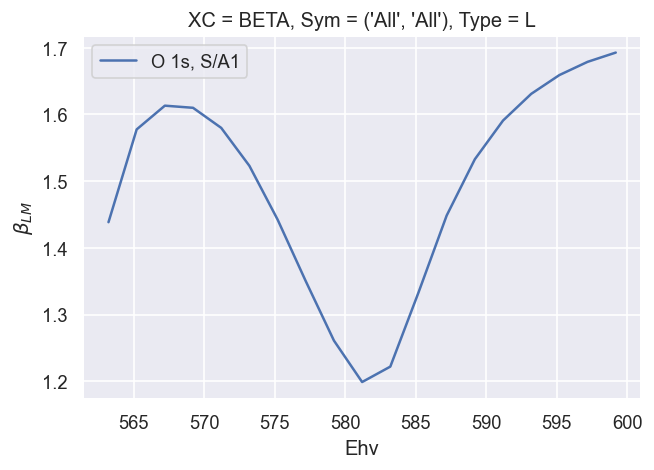

In [10]:
# Comparitive plot over datasets (all symmetries only)
N2Odata.plotGetCroComp(pType='BETA', Etype='Ehv', Erange=Erange, keys=datasets)

## Plot raw matrix elements

Plotting data N2O_wf.orb1_S_E1.0_6.0_97.0eV.inp.out, pType=a, thres=0.05, with Seaborn


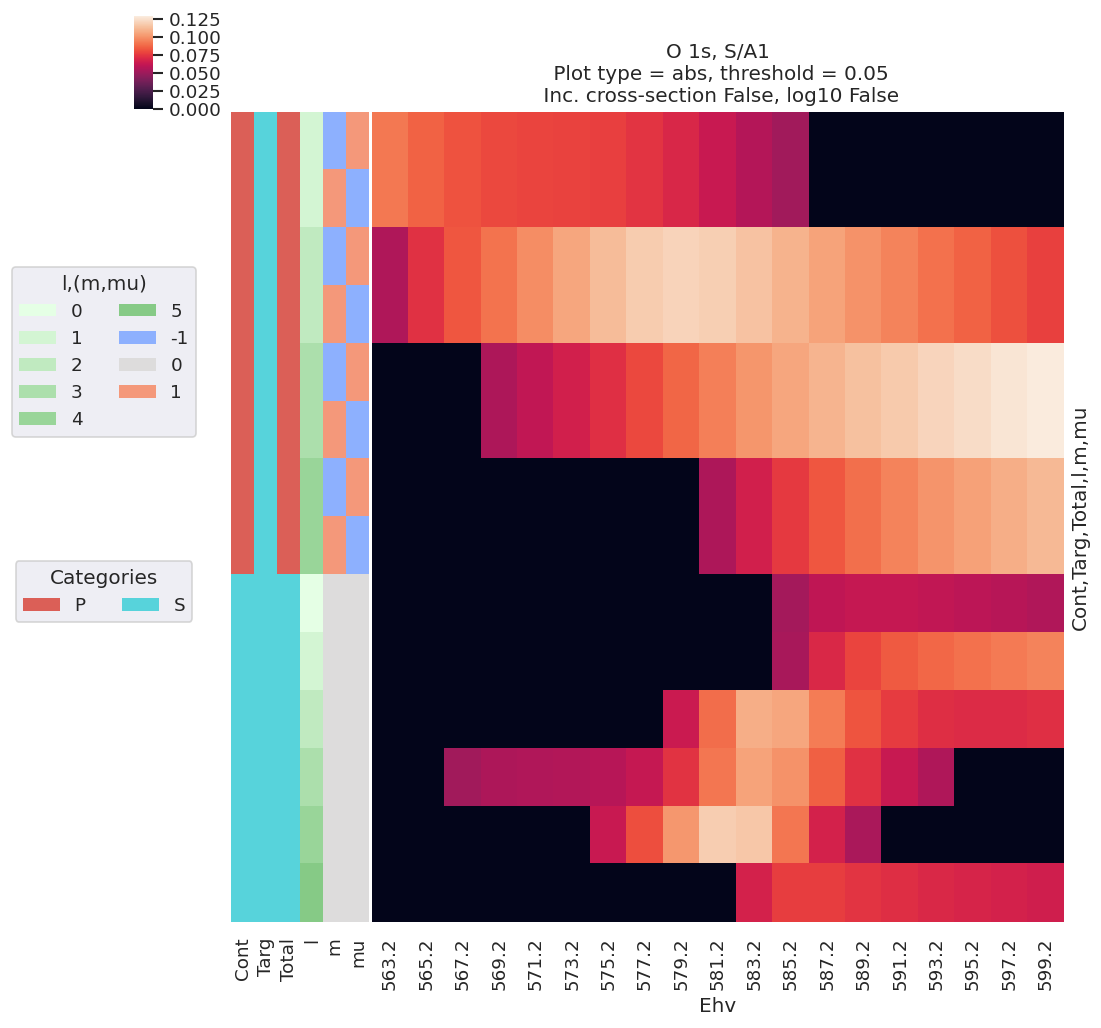

In [11]:
N2Odata.lmPlotOpts = {'selDims' : {'Type':'L', 'it' : 1}, 'fillna' : True, 'thres' : 0.05, 'SFflag' : False}
# N2Odata.lmPlotOpts = {'selDims' : {'Type':'L', 'it' : 1}, 'fillna' : True, 'thres' : 0.1, 'thresType' : 'pc', 'SFflag' : False} # ,
#                      'plotDims' : ('l','m','mu','Cont','Targ','Total')}  # Include this to force ordering of dims by l
# N2Odata.lmPlot(Etype='Ehv', keys=datasets)
# N2Odata.lmPlot(Etype='Eke', Erange=[0,50], keys=datasets)
N2Odata.lmPlot(Etype='Ehv', Erange=Erange, keys=datasets)

C:\Users\femtolab\.conda\envs\ePSdev\lib\site-packages\numpy\lib\function_base.py:1535: RuntimeWarning: invalid value encountered in remainder
  ddmod = mod(dd + pi, 2*pi) - pi


Plotting data N2O_wf.orb1_S_E1.0_6.0_97.0eV.inp.out, pType=phaseUW, thres=0.05, with Seaborn


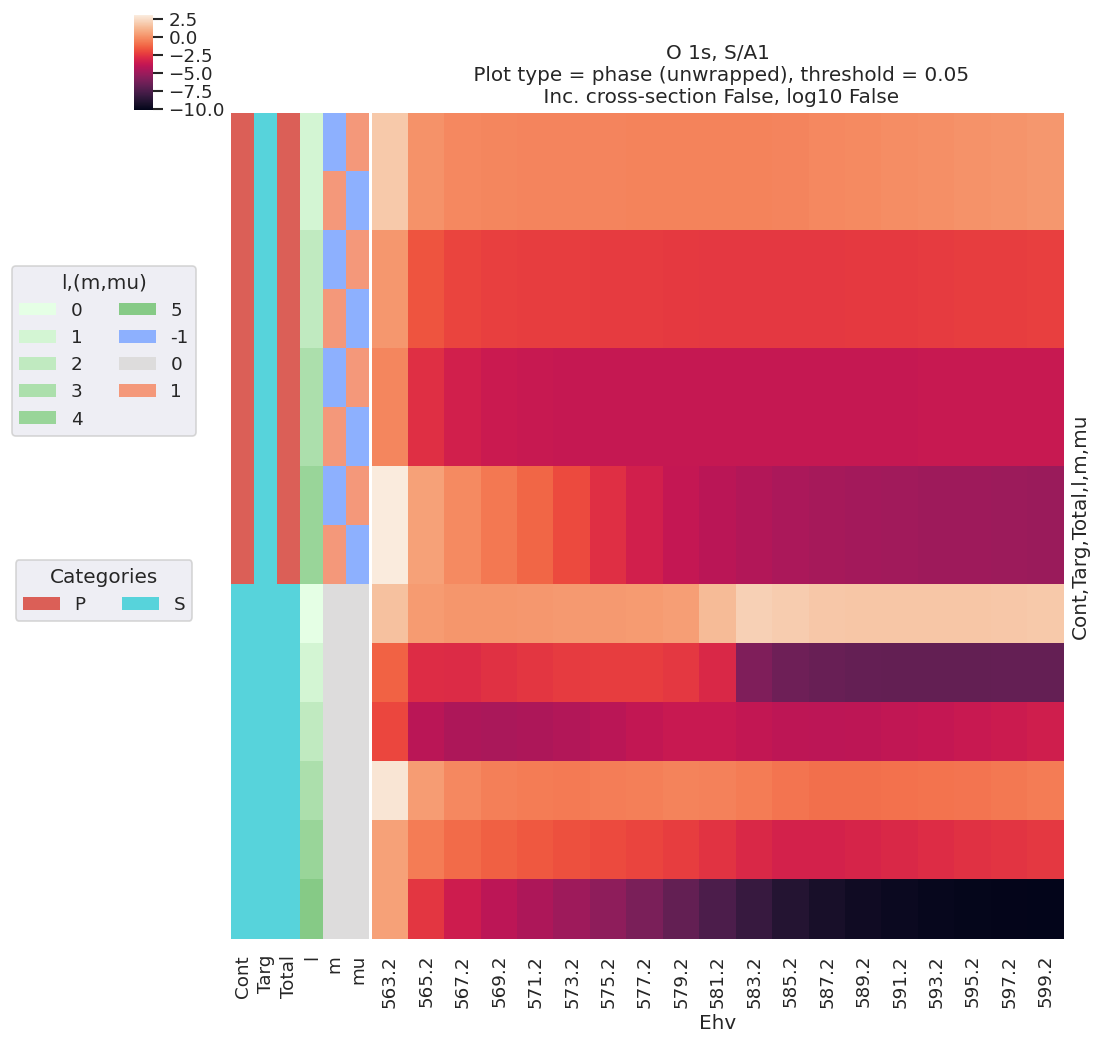

In [12]:
N2Odata.lmPlot(Etype='Ehv', Erange=Erange, keys=datasets, pType='phaseUW')

In [13]:
N2Odata.lmPlotOpts

{'selDims': {'Type': 'L', 'it': 1},
 'fillna': True,
 'thres': 0.05,
 'SFflag': False,
 'pType': 'phaseUW'}

## Angle-resolved data

In [91]:
# Class method dev

def mfpadNumeric(self, selDims = {'Type':'L','it':1}, keys = None, res = 50):
    """
    MFPADs "direct" (numerical), without beta parameter computation.
    
    Wrapper for :py:func:`epsproc.mfpad`, loops over all loaded datasets.
    
    NOTE: for large datasets and/or large res, this can be memory-hungry.
    
    """
    
    # Default to all datasets
    if keys is None:
        keys = self.dataSets.keys()

    
    # Loop over datasets & store output
    for key in keys:
        TX = []
        for m, item in enumerate(self.dataSets[key]['matE']):

            TXtemp, _ = ep.mfpad(self.dataSets[key]['matE'][m], inds=selDims, res=res)  # Expand MFPADs
            TX.append(TXtemp)
            
            # Propagate attrs
            TX[m].attrs = self.dataSets[key]['matE'][m].attrs
            TX[m]['dataType'] = 'mfpad'

        self.dataSets[key]['TX'] = TX
 


def mfpadPlot(self, selDims = {}, Erange = None, Etype = 'Eke', keys = None, pType = 'a', pStyle = 'polar', backend = 'mpl'):

    # Default to all datasets
        if keys is None:
            keys = self.dataSets.keys()

        # Loop over datasets
        for key in keys:
            for m, item in enumerate(self.dataSets[key]['TX']):
                plotFlag = True
                
                # More elegant way to swap on dims?
                subset = self.dataSets[key]['TX'][m]
                if Etype == 'Ehv':
                # Subset before plot to avoid errors on empty array selection!
                    subset = subset.swap_dims({'Eke':'Ehv'})
                    
                # Slice on Erange with/without step size - bit ugly.
                if Erange is not None:
                    if len(Erange) == 3:
                        subset = subset.sel(**{Etype:slice(Erange[0], Erange[1], Erange[2])})   # With dict unpacking for var as keyword
                    else:
                        subset = subset.sel(**{Etype:slice(Erange[0], Erange[1])})

                # Handling for Euler or Labels dim
                eDim = 'Euler'
                if hasattr(subset, 'Labels'):
#                 if 'Labels' in selDims:
                    subset = subset.swap_dims({'Euler':'Labels'})
                    eDim = 'Labels'
                    
                if selDims:
                    subset = subset.sel(selDims)
                
                # Check dimensionality - sum over Sym if necessary
                if subset.ndim > 3:
                    if 'Sym' in subset.dims:
                        subset = subset.sum('Sym').squeeze()
                    else:
                        print(f"*** ERROR: dataset {subset.jobLabel}  ndims = {subset.ndims}, dims = {subset.dims}. Skipping MFPAD plotting.")
                        plotFlag = False
                
                # Plot
                if plotFlag:
                    if eDim in subset.dims:
                        # TODO: make this more robust. Currently assumes Euler dim is 1st dim.
                        if subset[eDim].size > 1:
                            if pStyle is 'polar':
                                for EulerInd in range(0,subset[eDim].size):
    #                                 print(f"*** Pol Geom: {subset[eDim][EulerInd].item()}")  # Need to pass all this through to plotters otherwise appears before plots!

                                    _ = ep.sphSumPlotX(subset[EulerInd], pType = pType, backend = backend, facetDim = Etype)
                            
                            elif pStyle is 'grid':
#                                 subset.pipe(np.abs).plot(y='Theta',x='Phi', row=eDim, col=Etype, robust=True)
                                    # If Phi is sliced, assumed 2D (Theta,E) plots
                                if 'Phi' in selDims.keys():
                                    print(subset)
                                    subset.pipe(np.abs).plot(x='Theta', y=Etype, col=eDim, robust=True)
                                else:
#                                     subset.pipe(np.abs).plot(y='Theta',x='Phi', row=eDim, col=Etype, robust=True)
                                    subset.plot(y='Theta',x='Phi', row=eDim, col=Etype, robust=True)
                               
                    else:
                        _ = ep.sphSumPlotX(subset, pType = pType, backend = backend, facetDim = Etype)


# 05/10/20 - CODE BELOW NOW SET IN MAIN FUNCTION ep.sphPlot.sphPlotPL(). May want to revisit this for testing however.
# For local testing, see http://localhost:8889/notebooks/dev/ePSproc/classDev/ePSproc_multijob_class_tests_N2O_011020_Stimpy_PLrenderTESTING_local.ipynb
# Note some Plotly rendering issues in Jupyter + Firefox (both lab and notebook), but seems reliable in Vivaldi.
# 
# #*** MODIFIED CODE FROM sphPlot.sphPlotPL for testing
# # TODO:
# # - Fix independent plot aspect ratios
# # - Add plot titles

# import plotly.graph_objects as go
# from plotly.subplots import make_subplots

# # Plot as Plotly subplots, as function of selected dim.
# # Currently set for subplotting over facetDim, but assumes other dims (theta,phi)
# def sphPlotPL(self, dataPlot, theta, phi, facetDim = 'Eke', rc = None):
#     '''
#     Plot spherical polar function (R,theta,phi) to a Cartesian grid, using Plotly.

#     Parameters
#     ----------
#     dataPlot : np.array or Xarray
#         Values to plot, single surface only, with dims (theta,phi).

#     theta, phi : np.arrays
#         Angles defining spherical polar grid, 2D arrays.

#     facetDim : str, default 'Eke'
#         Dimension to use for faceting (subplots), currently set for single dim only.

#     Returns
#     -------
#     fig
#         Handle to figure.

#     '''

#     # Set up subplots
#     nData = dataPlot[facetDim].size

#     if rc is None:
#         nCols = 3
#         rc = [nData/nCols, nCols]

#     # rc = np.round(rc).astype(np.int)  # Fix dtype - Plotly throws type error for np types however.
#     rc = [int(np.round(rc[0])), int(np.round(rc[1]))]

#     pType = {'type':'surface'}
#     specs = [[pType] * rc[1] for i in range(rc[0])]  # Set specs as 2D list of dicts.

#     fig = make_subplots(rows=rc[0], cols=rc[1], specs=specs)
#     nPlots = rc[0] * rc[1]

#     # Add surfaces
#     # From https://plot.ly/python/3d-subplots/

#     n=0
#     for rInd in range(1,rc[0]+1):
#         for cInd in range(1,rc[1]+1):
#             if n < nData:
#                 X,Y,Z = ep.sphToCart(dataPlot.sel({facetDim:dataPlot[facetDim][n]}),theta,phi)  # Bit ugly, probably a better way to select here.
#                 fig.add_trace(
#                     go.Surface(x=X, y=Y, z=Z, colorscale='Viridis', showscale=False),
#                     row=rInd, col=cInd)  # Needs some work here...
#                     # title=[facetDim + '=' + str(dataPlot[facetDim][n].data.item())]),

#                 # fig['layout'].update(scene=dict(aspectmode="data"))  # Try and fix aspect ratio issues - getting stuck on first subplot?  Seems independent of setting here.

#                 # DOESN'T WORK
#                 # From https://github.com/plotly/plotly.py/issues/70
#                 # fig['layout'].update(scene=dict(
#                 #                     aspectmode='manual',
#                 #                     aspectratio=go.layout.scene.Aspectratio(
#                 #                     x=x.ptp(), y=y.ptp(), z=z.pyp())))

#                 n=n+1

#     fig.show()

#     return fig

In [92]:
# Monkey patch for new plotters
# See, e.g., https://stackoverflow.com/a/2982
import types

N2Odata.mfpadNumeric = types.MethodType(mfpadNumeric, N2Odata)
N2Odata.mfpadPlot = types.MethodType(mfpadPlot, N2Odata)
N2Odata.sphPlotPL = types.MethodType(sphPlotPL, N2Odata)

In [16]:
# Compute...

N2Odata.mfpadNumeric()

In [93]:
# PL testing - wrapper code from sphSumPlotX
pType = 'a'
Etype = 'Eke'
facetDim = Etype
Erange = [5, 10, 3]

dataPlot = N2Odata.dataSets[0]['TX'][0].sel(**{Etype:slice(Erange[0], Erange[1])}).sum('Sym')
theta, phi = np.meshgrid(dataPlot.Theta, dataPlot.Phi)
dataPlot = ep.plotTypeSelector(dataPlot, pType = pType)

fig = N2Odata.sphPlotPL(dataPlot[0], theta, phi, facetDim)

In [94]:
# fig

In [95]:
N2Odata.mfpadPlot(Etype = 'Ehv', Erange = [560, 590, 10], selDims = {'Labels':['z','x']}, keys =[0], backend = 'pl')

# NOTE: in Jupyter Lab Plotly backend currently not always rendering properly (Firefox, Plotly 4.11). Same in Notebook - might be Firefox issue? (Notebook version renders in Opera... try again after reboot!)

Plotting with pl


Plotting with pl


In [96]:
N2Odata.mfpadPlot(Etype = 'Ehv', Erange = [560, 620, 8], keys =[0], pStyle='grid', backend = 'mpl')

IndexError: arrays used as indices must be of integer (or boolean) type

<Figure size 1300x900 with 13 Axes>

<xarray.DataArray (Labels: 3, Theta: 50, Ehv: 29)>
array([[[-2.29551927e-02-2.67674814e-02j,
          4.88916457e-03+3.10045378e-02j,
          3.14648287e-02+5.20720699e-03j, ...,
         -5.35992942e-02-3.59276901e-02j,
         -5.95379233e-02-3.83695638e-02j,
         -5.57562171e-02-3.67093151e-02j],
        [-2.26609556e-02-2.66767753e-02j,
          4.65919521e-03+3.07269628e-02j,
          3.09590744e-02+5.35456771e-03j, ...,
         -5.18094466e-02-3.49805594e-02j,
         -5.74939622e-02-3.74091452e-02j,
         -5.42300677e-02-3.60295664e-02j],
        [-2.17878019e-02-2.64038824e-02j,
          3.98037238e-03+2.99019191e-02j,
          2.94641638e-02+5.78423056e-03j, ...,
         -4.65623865e-02-3.22559160e-02j,
         -5.15133160e-02-3.46419045e-02j,
         -4.96596116e-02-3.40411488e-02j],
        ...,
        [ 2.57303618e-03+4.17188317e-03j,
         -1.45432882e-02+1.88656884e-02j,
         -7.66094985e-03+3.29670343e-02j, ...,
         -1.33506925e-01-8.6403

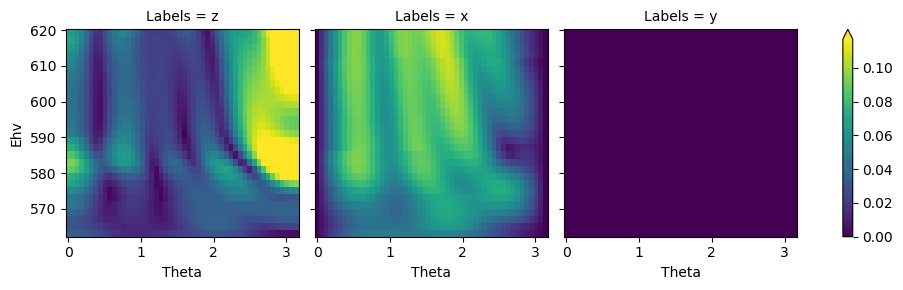

In [89]:
selDims = {'Phi':0}
N2Odata.mfpadPlot(Etype = 'Ehv', Erange = [550,620], selDims = selDims, pStyle='grid', keys = [0], backend = 'mpl')

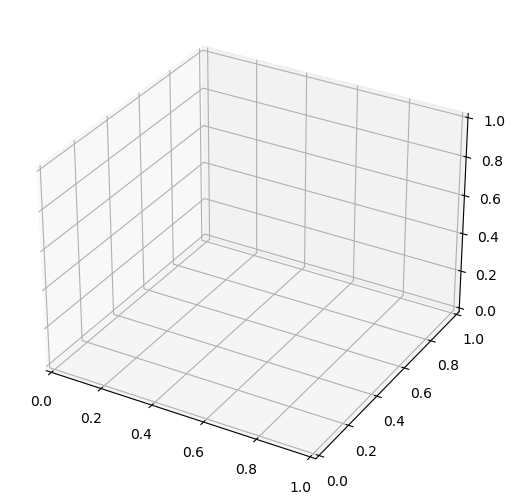

In [21]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
# ax.set_axis_off()
plt.title('')
plt.show()

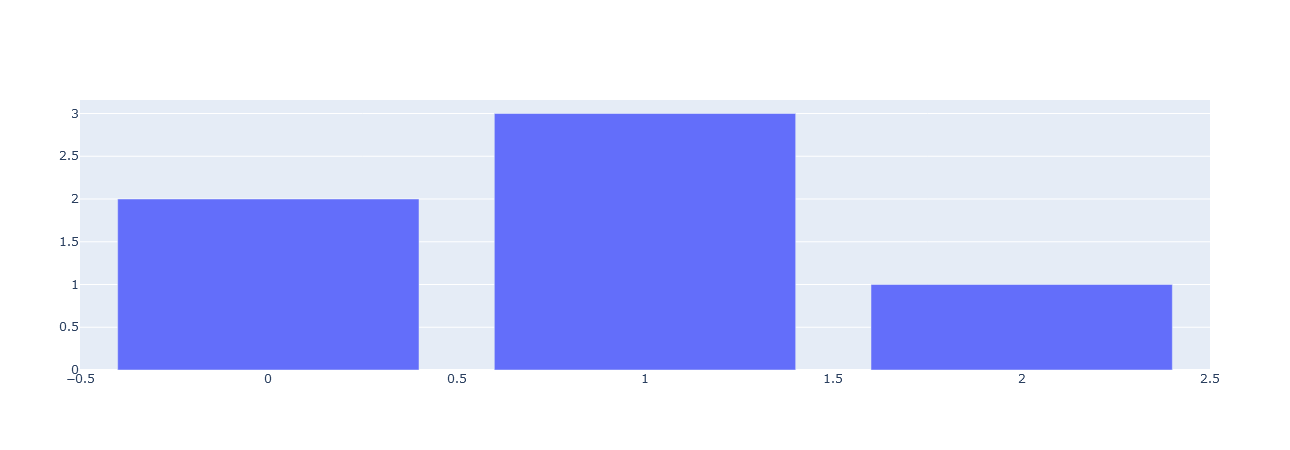

In [22]:
# Plotly test, seems OK
# https://plotly.com/python/getting-started/
import plotly.graph_objects as go
fig = go.FigureWidget(data=go.Bar(y=[2, 3, 1]))
fig.show()

In [23]:
dir(ax)

['M',
 '_3d_extend_contour',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autoscaleZon',
 '_autotitlepos',
 '_axes',
 '_axes_locator',
 '_axis3don',
 '_axisbelow',
 '_box_aspect',
 '_button_press',
 '_button_release',
 '_clipon',
 '_clippath',
 '_contains',
 '_convert_dx',
 '_current_image',
 '_default_contains',
 '_draw_grid',
 '_facecolor',
 '_fill_between_x_or_y',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_generate_normals',
 '_get_axis_list',
 '_get_axis_map',


In [24]:
os.listdir(fileBase)

['orb1_S', 'orb2_S', 'orb3_S', 'orb4_S', 'orb5_S', 'orb6_S', 'test.txt']

In [25]:
list(Path(fileBase).iterdir())

[WindowsPath('D:/VMs/Share/ePSshare/N2O/N20_wf/orb1_S'),
 WindowsPath('D:/VMs/Share/ePSshare/N2O/N20_wf/orb2_S'),
 WindowsPath('D:/VMs/Share/ePSshare/N2O/N20_wf/orb3_S'),
 WindowsPath('D:/VMs/Share/ePSshare/N2O/N20_wf/orb4_S'),
 WindowsPath('D:/VMs/Share/ePSshare/N2O/N20_wf/orb5_S'),
 WindowsPath('D:/VMs/Share/ePSshare/N2O/N20_wf/orb6_S'),
 WindowsPath('D:/VMs/Share/ePSshare/N2O/N20_wf/test.txt')]

In [26]:
list(os.scandir(fileBase))

[<DirEntry 'orb1_S'>,
 <DirEntry 'orb2_S'>,
 <DirEntry 'orb3_S'>,
 <DirEntry 'orb4_S'>,
 <DirEntry 'orb5_S'>,
 <DirEntry 'orb6_S'>,
 <DirEntry 'test.txt'>]

In [27]:
# os.walk provides dirs and files as separate lists.
dirList = list(os.walk(fileBase))   # This will pull everything, inc. subdir contents, with tuple per dir
dirListN = next(os.walk(fileBase))  # With next to scan only root dir.

# With abs path
paths = [os.path.join(fileBase, fn) for fn in next(os.walk(fileBase))[1]]

In [28]:
dirListN

('D:\\VMs\\Share\\ePSshare\\N2O\\N20_wf',
 ['orb1_S', 'orb2_S', 'orb3_S', 'orb4_S', 'orb5_S', 'orb6_S'],
 ['test.txt'])

In [29]:
paths

['D:\\VMs\\Share\\ePSshare\\N2O\\N20_wf\\orb1_S',
 'D:\\VMs\\Share\\ePSshare\\N2O\\N20_wf\\orb2_S',
 'D:\\VMs\\Share\\ePSshare\\N2O\\N20_wf\\orb3_S',
 'D:\\VMs\\Share\\ePSshare\\N2O\\N20_wf\\orb4_S',
 'D:\\VMs\\Share\\ePSshare\\N2O\\N20_wf\\orb5_S',
 'D:\\VMs\\Share\\ePSshare\\N2O\\N20_wf\\orb6_S']

In [30]:
# Equivalent with pathlib
# https://stackoverflow.com/a/30925692
[p for p in Path(fileBase).iterdir() if p.is_dir()]

[WindowsPath('D:/VMs/Share/ePSshare/N2O/N20_wf/orb1_S'),
 WindowsPath('D:/VMs/Share/ePSshare/N2O/N20_wf/orb2_S'),
 WindowsPath('D:/VMs/Share/ePSshare/N2O/N20_wf/orb3_S'),
 WindowsPath('D:/VMs/Share/ePSshare/N2O/N20_wf/orb4_S'),
 WindowsPath('D:/VMs/Share/ePSshare/N2O/N20_wf/orb5_S'),
 WindowsPath('D:/VMs/Share/ePSshare/N2O/N20_wf/orb6_S')]

In [31]:
[entry for entry in os.scandir(fileBase) if entry.is_dir()]

[<DirEntry 'orb1_S'>,
 <DirEntry 'orb2_S'>,
 <DirEntry 'orb3_S'>,
 <DirEntry 'orb4_S'>,
 <DirEntry 'orb5_S'>,
 <DirEntry 'orb6_S'>]

In [32]:
temp=list(enumerate(N2Odata.jobs['jobDirs']))
print(temp)

[(0, WindowsPath('D:/VMs/Share/ePSshare/N2O/N20_wf/orb1_S')), (1, WindowsPath('D:/VMs/Share/ePSshare/N2O/N20_wf/orb2_S')), (2, WindowsPath('D:/VMs/Share/ePSshare/N2O/N20_wf/orb3_S')), (3, WindowsPath('D:/VMs/Share/ePSshare/N2O/N20_wf/orb4_S')), (4, WindowsPath('D:/VMs/Share/ePSshare/N2O/N20_wf/orb5_S')), (5, WindowsPath('D:/VMs/Share/ePSshare/N2O/N20_wf/orb6_S'))]


In [33]:
keysIn = [0,1,2]
keys = [(n, N2Odata.jobs['jobDirs'][n]) for n in keysIn]
print(keys)

[(0, WindowsPath('D:/VMs/Share/ePSshare/N2O/N20_wf/orb1_S')), (1, WindowsPath('D:/VMs/Share/ePSshare/N2O/N20_wf/orb2_S')), (2, WindowsPath('D:/VMs/Share/ePSshare/N2O/N20_wf/orb3_S'))]
